<a href="https://colab.research.google.com/github/ENRICOBIGNOZZI1998/Trading-bot/blob/main/ALPACA_TRADING_BOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 557 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
import requests
from datetime import timezone, datetime, timedelta, date , time
import seaborn as sns

In [ ]:
def normalizedMinMax(array):
    normalized_array=[]
    for elements in array:
        normalized_array.append((elements-min(array))/(max(array)-min(array)))
    return normalized_array
def normalizeMax(array):
    normalized_array=[]
    for elements in array:
        normalized_array.append(elements/max(array))
    return normalized_array
def normalizeMaxMin(array):
    normalized_array=[]
    for elements in array:
        if elements>0:
            normalized_array.append(elements/max(array))
        else:
            normalized_array.append(-elements/(min(array)))#[array!=0]
    return normalized_array
def percPosNeg(array,soglia):
    if len(array)==0:
        return 0,0
    contapos=0
    contaneg=0
    for el in array:
        if el>soglia:
            contapos+=1
        if el<=soglia:
            contaneg+=1
    return round(contapos/len(array)*100,2),round(contaneg/len(array)*100,2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

import yfinance as yf

symbol_btc='BTC-USD'
dati_btc = yf.download(  
        tickers = symbol_btc,
        period = "2mo",# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max  (optional, default is '1mo')
        interval = "1h",# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo (optional, default is '1d')
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None)


symbol_eth='ETH-USD'
dati_eth = yf.download(  
        tickers = symbol_btc,
        period = "2mo",# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max  (optional, default is '1mo')
        interval = "1h",# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo (optional, default is '1d')
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
dati_btc['open']=dati_btc['Open']
dati_btc['high']=dati_btc['High']
dati_btc['low']=dati_btc['Low']
dati_btc['close']=dati_btc['Close']
dati_btc['volume']=dati_btc['Volume']
columns=["open", "high", "low", "close", "volume"]
dati_btc=dati_btc[columns]
dati_btc["avg"]=dati_btc.mean(axis=1)#open+close+low+high/4
dati_btc['hour']=dati_btc.index.hour
dati_btc["med"]=dati_btc.open+(dati_btc.high-dati_btc.low)/2 #centro geometrico dell'escursione
dati_btc["medbody"]=dati_btc.open+abs(dati_btc.open-dati_btc.close)/2#centro geometrico escursione candela
dati_btc["body"]=dati_btc.close-dati_btc.open #estensione della candela e colore 
dati_btc["range"]=dati_btc.high-dati_btc.low
dati_btc["avg"]=round(dati_btc.mean(axis=1),7)#open+close+low+high/4
dati_btc["range"]=round(dati_btc.high-dati_btc.low,7)
dati_btc["CO"]=round(dati_btc.close-dati_btc.open,7)
dati_btc["OL"]=round(dati_btc.open-dati_btc.low,7)
dati_btc["HO"]=round(dati_btc.high-dati_btc.open,7)
dati_btc["CL"]=round(dati_btc.close-dati_btc.low,7)
dati_btc["HC"]=round(dati_btc.high-dati_btc.close,7)
dati_btc["Closeperc"]=round(dati_btc.body/dati_btc.range*100,7)
dati_btc["Color"]=list(map(lambda x:"black" if x<= 0 else "white",dati_btc.CO))
#dati_btc=dati_btc.apply(lambda x: round(x,2))#prendo solo 2 cifre dopo la virgola
dati_btc["CO"]=round(dati_btc.close-dati_btc.open,7)
dati_btc["OL"]=round(dati_btc.open-dati_btc.low,7)
dati_btc["HO"]=round(dati_btc.high-dati_btc.open,7)
dati_btc["CL"]=round(dati_btc.close-dati_btc.low,7)
dati_btc["HC"]=round(dati_btc.high-dati_btc.close,7)
dati_btc["Closeperc"]=round(dati_btc.body/dati_btc.range*100,7)
dati_btc["Color"]=list(map(lambda x:"black" if x<= 0 else "white",dati_btc.CO))
dati_btc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,open,high,low,close,volume,avg,hour,med,medbody,body,range,CO,OL,HO,CL,HC,Closeperc,Color
2022-09-01 19:00:00,19828.691406,19884.779297,19806.652344,19849.941406,0,1.227905e+04,19,19867.754883,19839.316406,21.250000,78.126953,21.250000,22.039062,56.087891,43.289062,34.837891,27.199320,white
2022-09-01 20:00:00,19854.193359,20065.130859,19854.193359,20065.130859,363923456,3.971312e+07,20,19959.662109,19959.662109,210.937500,210.937500,210.937500,0.000000,210.937500,210.937500,0.000000,100.000000,white
2022-09-01 21:00:00,20064.867188,20119.892578,20063.500000,20088.865234,317700096,3.467062e+07,21,20093.063477,20076.866211,23.998047,56.392578,23.998047,1.367188,55.025391,25.365234,31.027344,42.555329,white
2022-09-01 22:00:00,20087.416016,20149.117188,20083.312500,20092.783203,0,1.243625e+04,22,20120.318359,20090.099609,5.367188,65.804688,5.367188,4.103516,61.701172,9.470703,56.333984,8.156239,white
2022-09-01 23:00:00,20089.234375,20124.507812,20070.943359,20124.507812,0,1.243871e+04,23,20116.016602,20106.871094,35.273438,53.564453,35.273438,18.291016,35.273438,53.564453,0.000000,65.852325,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01 16:00:00,20425.906250,20479.822266,20410.914062,20413.400391,0,1.264009e+04,16,20460.360352,20432.159180,-12.505859,68.908203,-12.505859,14.992188,53.916016,2.486328,66.421875,-18.148579,black
2022-11-01 17:00:00,20416.525391,20445.531250,20411.720703,20429.177734,659456,8.457368e+04,17,20433.430664,20422.851562,12.652344,33.810547,12.652344,4.804688,29.005859,17.457031,16.353516,37.421293,white
2022-11-01 18:00:00,20432.767578,20456.896484,20427.437500,20456.896484,153567232,1.676543e+07,18,20447.497070,20444.832031,24.128906,29.458984,24.128906,5.330078,24.128906,29.458984,0.000000,81.906782,white
2022-11-01 19:00:00,20458.878906,20479.564453,20441.492188,20441.492188,94273536,1.029704e+07,19,20477.915039,20467.572266,-17.386719,38.072266,-17.386719,17.386719,20.685547,0.000000,38.072266,-45.667676,black


In [ ]:
stop_loss_BTC_long=dati_btc[dati_btc["CO"]>0]["OL"].describe([.95])
stop_loss_BTC_short=-dati_btc[dati_btc["CO"]>0]["OL"].describe([.95])

2022-10-02 2022-10-17 2022-10-25


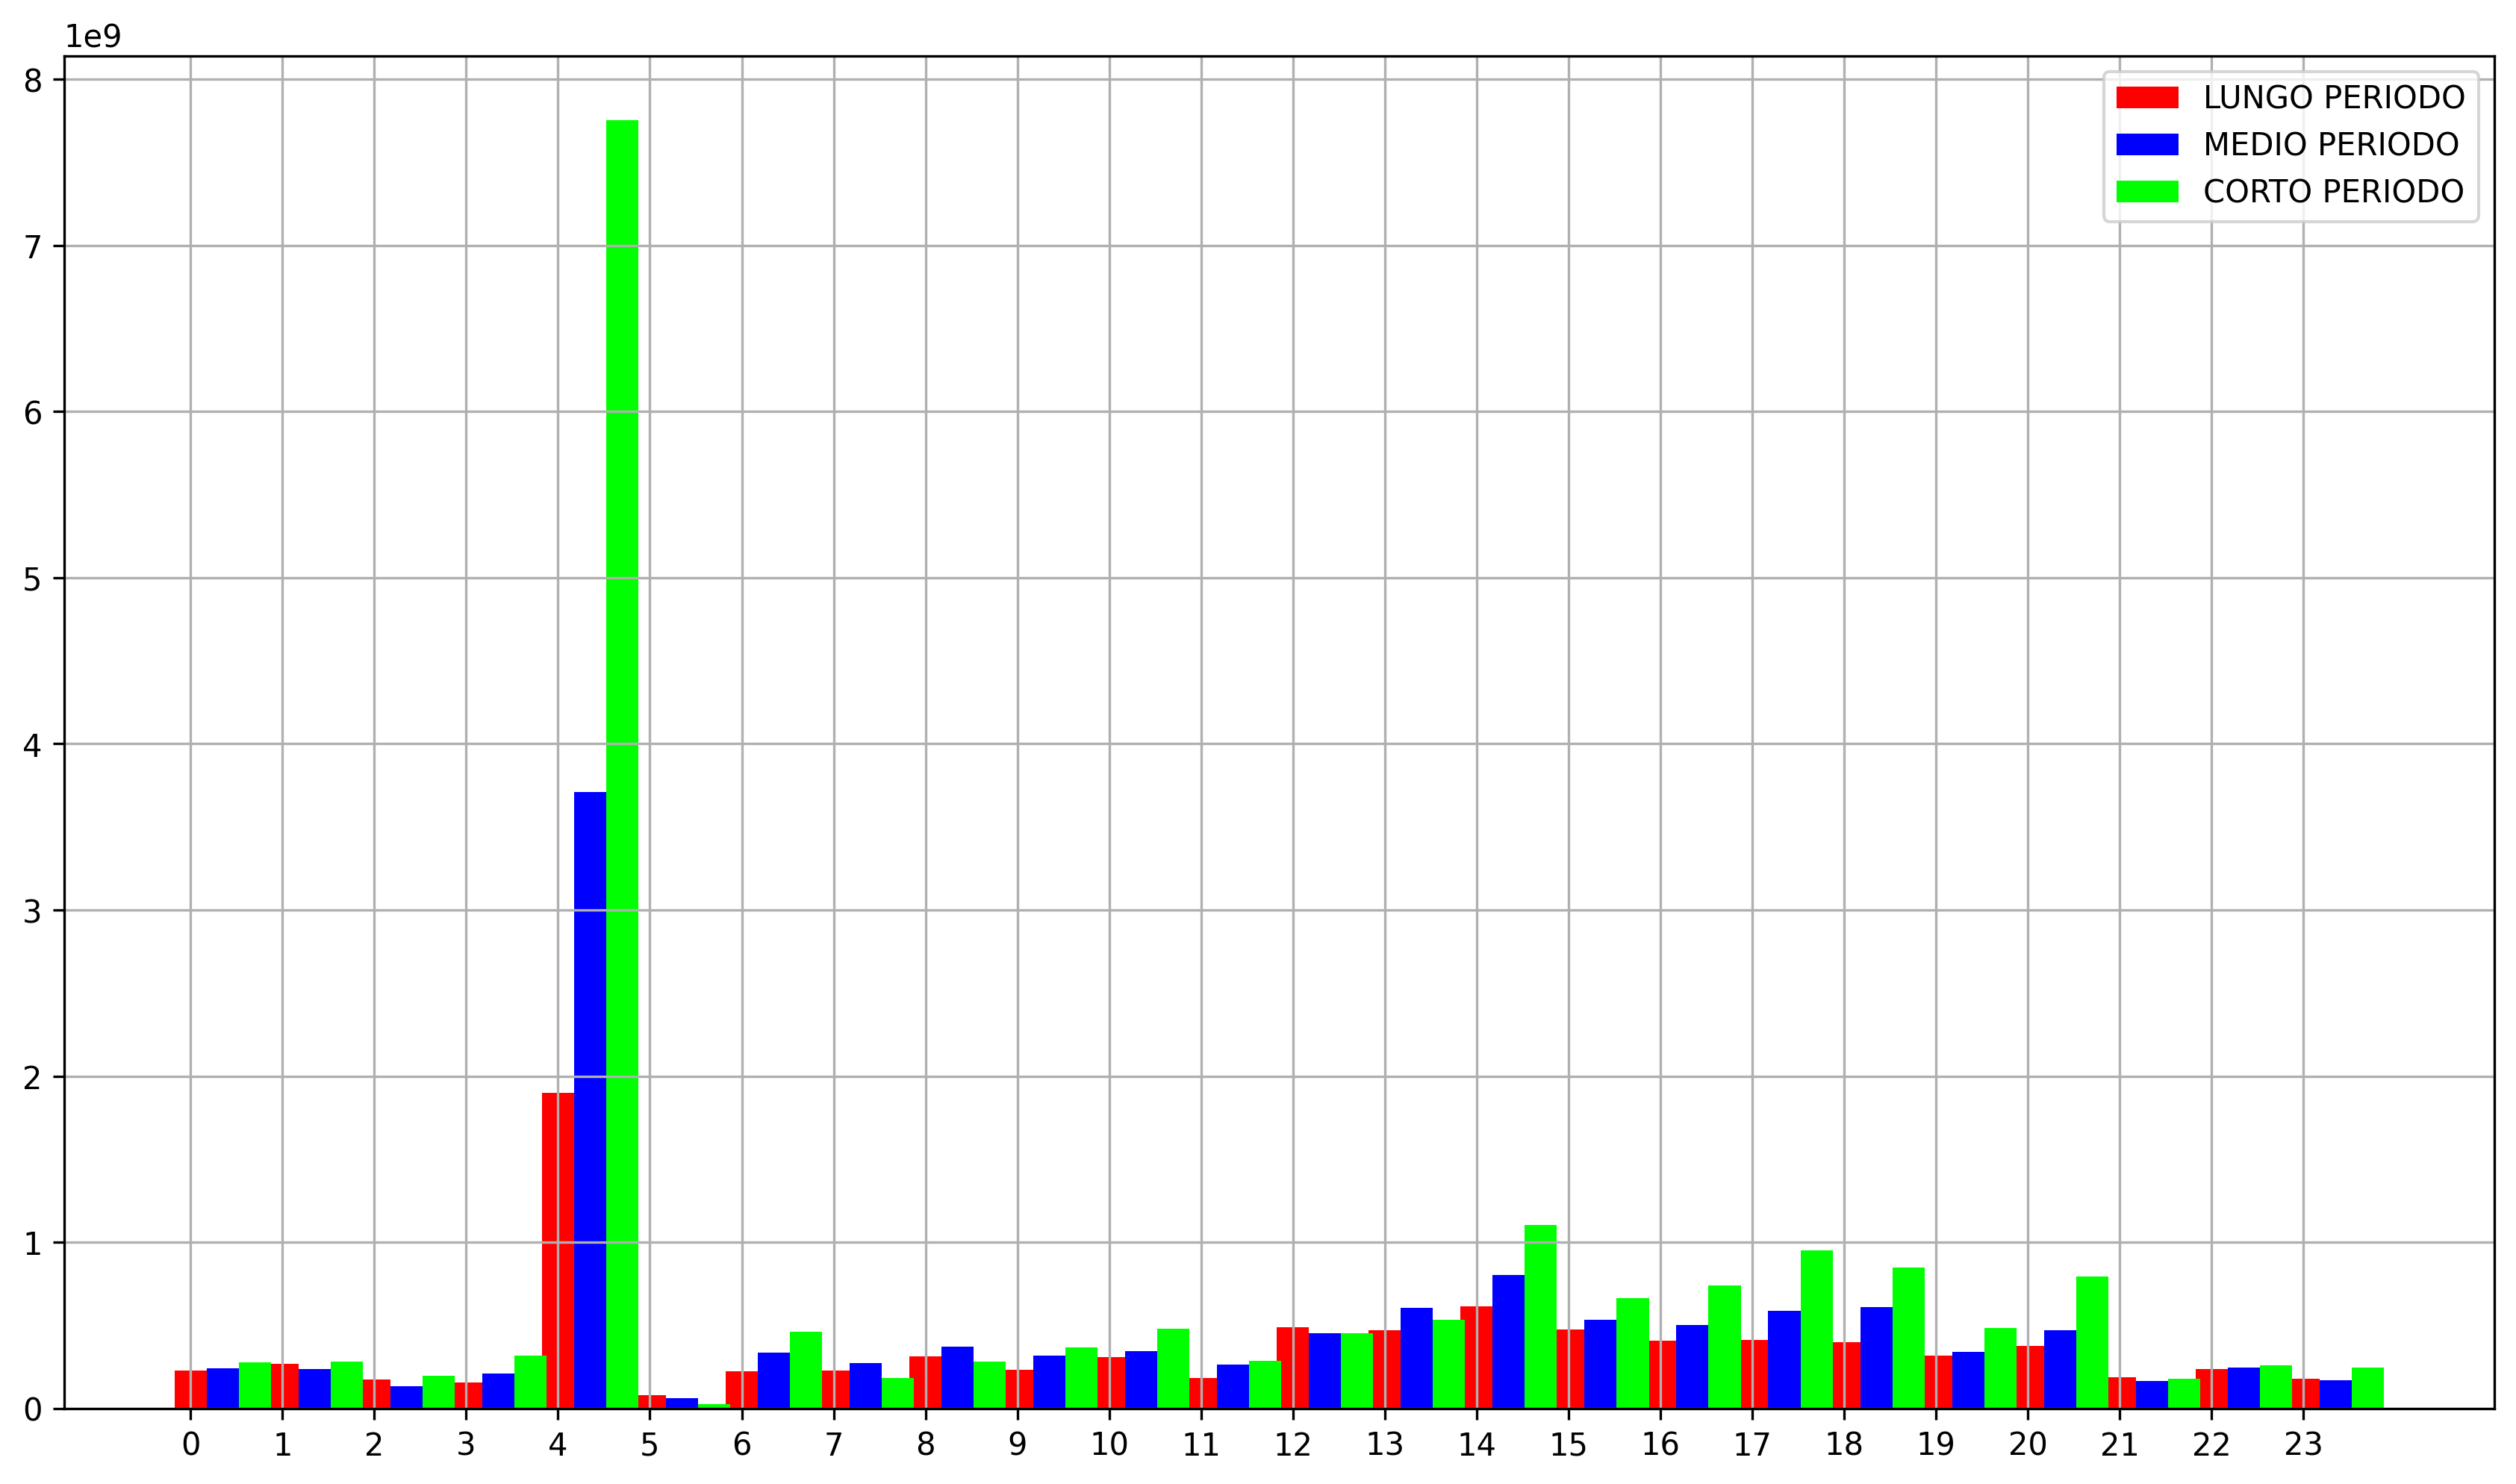

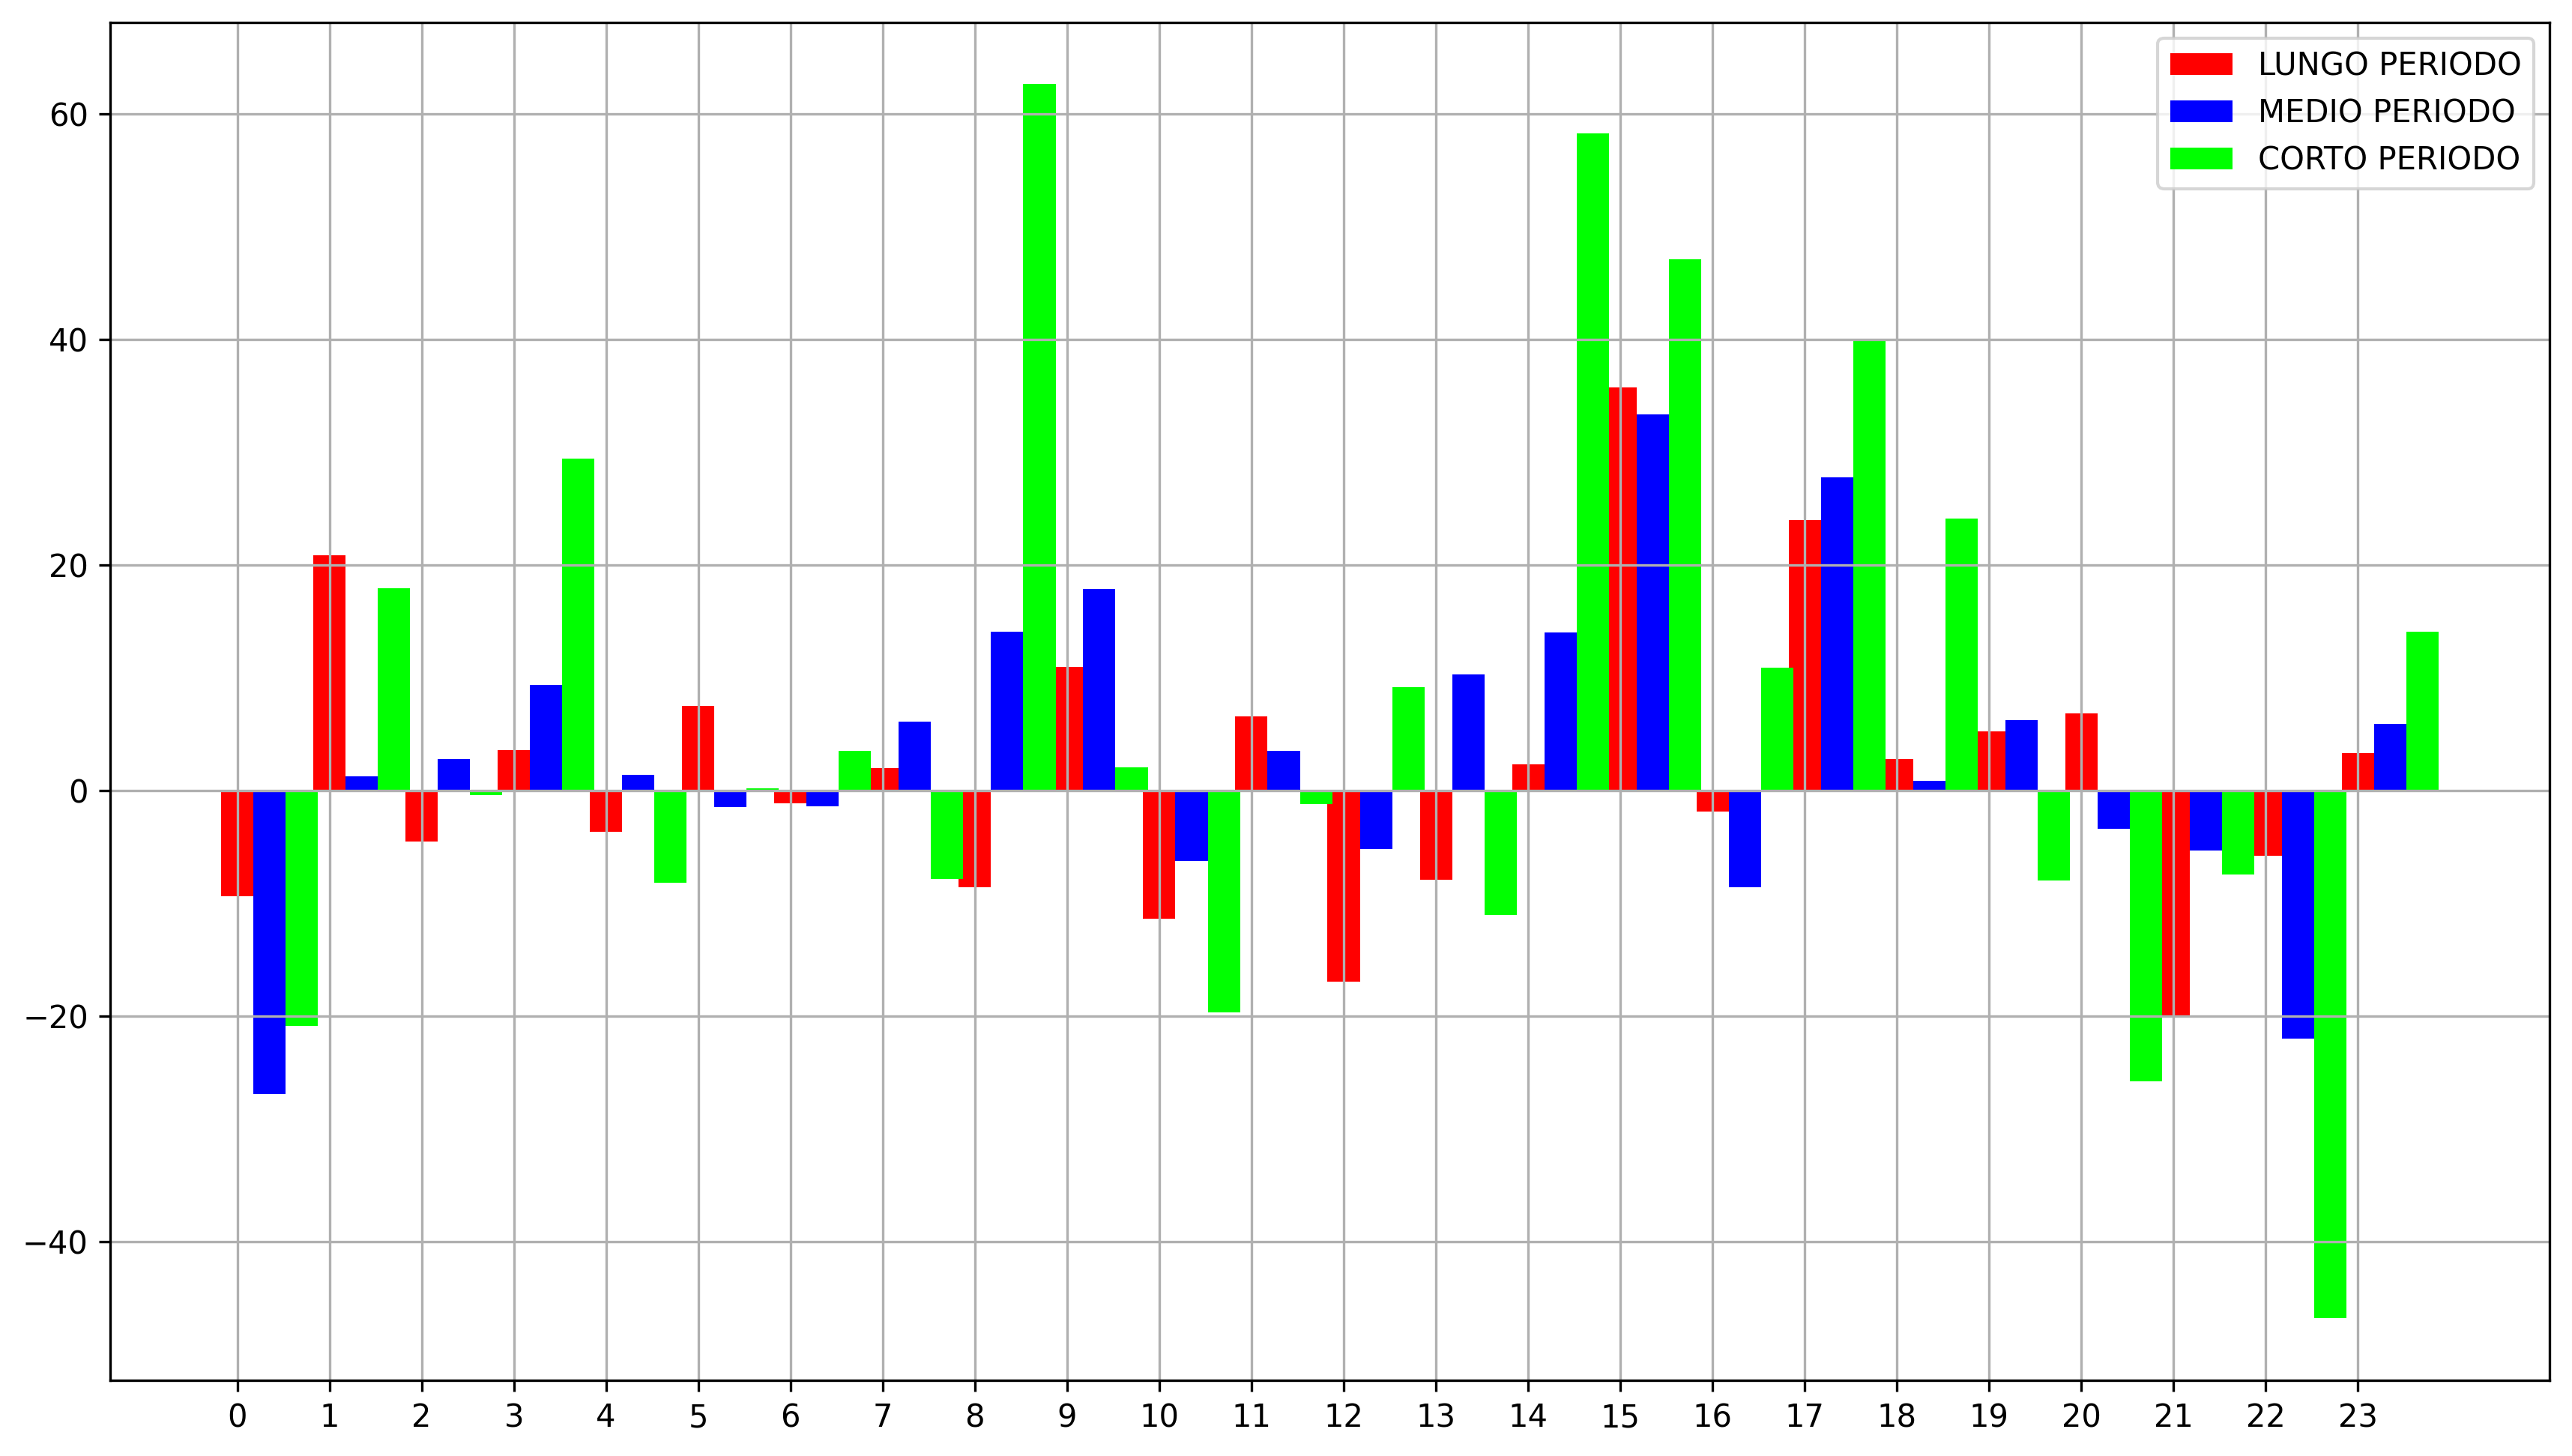

[1, 3, 9, 14, 15, 17, 18, 23]
[20.8454427, 3.5836589, 10.9332682, 2.3235026, 35.711263, 23.9479167, 2.7609375, 3.3208984] [1.2365885, 9.3830729, 17.8544271, 13.9908854, 33.3385417, 27.7898438, 0.8240885, 5.9247396] [17.9012277, 29.4020647, 2.0664062, 58.2887835, 47.1199777, 40.03125, 24.1146763, 14.0736607]
[0, 10, 21, 22]
[-9.3819934, -11.3401693, -20.0723958, -5.8035156] [-26.8885498, -6.2441406, -5.3580729, -21.9914062] [-20.8625488, -19.6439732, -7.4302455, -46.8158482]
dim 8 4
[0, 0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0]
orari Long [1, 1] [16, 19]
peso vettori Long [26.7088542, 0, 0, 0, 0, 0, 0, 0] [28.6139323, 0, 0, 0, 0, 0, 0, 0] [64.1459263, 0, 0, 0, 0, 0, 0, 0]
peso totale Long [119.46871279999999, 0, 0, 0, 0, 0, 0, 0]
orari Short [21] [23]
peso vettori Short [0, 0, -25.8759114, 0] [0, 0, -27.3494791, 0] [0, 0, -54.246093699999996, 0]
peso totale Short [0, 0, -107.47148419999999, 0]


In [ ]:
today=date.today()
DeltaLong= timedelta(days=30)
DeltaMid= timedelta(days=15)
DeltaShort= timedelta(days=7)

endDateLongParsed= today
endDateMidParsed= today
endDateShortParsed= today

startDateLongParsed= (endDateLongParsed-DeltaLong)
startDateMidParsed= (endDateMidParsed-DeltaMid)
startDateShortParsed= (endDateShortParsed-DeltaShort)
print(startDateLongParsed,startDateMidParsed,startDateShortParsed )

normalize=False

instruments_Long=dati_btc.loc[(startDateLongParsed):(endDateLongParsed)]
instruments_Mid=dati_btc.loc[startDateMidParsed:endDateMidParsed]
instruments_Short=dati_btc.loc[startDateShortParsed:endDateShortParsed]

activity_long=[]
activity_mid=[]
activity_short=[]
hours=[]
for hour in range (0,24):
    hours.append(hour)
for hour in hours:
    activity_long.append(round(instruments_Long[(instruments_Long.hour==hour)].volume.mean(),7))
    activity_mid.append(round(instruments_Mid[(instruments_Mid.hour==hour)].volume.mean(),7))
    activity_short.append(round(instruments_Short[(instruments_Short.hour==hour)].volume.mean(),7))
activity_long=np.where(np.isnan(activity_long), 0, activity_long)
activity_mid=np.where(np.isnan(activity_mid), 0, activity_mid)
activity_short=np.where(np.isnan(activity_short), 0, activity_short)
if normalize==True:
    activity_long=normalizeMax(activity_long)
    activity_mid=normalizeMax(activity_mid)
    activity_short=normalizeMax(activity_short)

n_groups=24
fig,ax=plt.subplots(figsize=(14,8),dpi=300)
index=np.arange(n_groups)
bar_width=0.35
opacity=1
rectls1=ax.bar(index,activity_long,bar_width,alpha=opacity,color='red',label='LUNGO PERIODO')
rectls2=ax.bar(index+bar_width,activity_mid,bar_width,alpha=opacity,color='blue',label='MEDIO PERIODO')
rectls3=ax.bar(index+2*bar_width,activity_short,bar_width,alpha=opacity,color='lime',label='CORTO PERIODO')

ax.set_xlabel=('trading hours')
if normalize==True:
    ax.set_ylabel('normalized volumes')
ax.set_ylabel=('volumes')
ax.set_xticks(index)
ax.set_xticklabels((['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']))
ax.legend()
ax.grid(True)
plt.show()
hour_bias=[]
for hour in hours:
    hour_bias.append(round(dati_btc[(dati_btc.hour==hour)].body.mean(),7))
hour_bias=np.where(np.isnan(hour_bias), 0, hour_bias)        
def normalizeMaxMin(array):
    normalized_array=[]
    for elements in array:
        if elements>0:
            normalized_array.append(elements/max(array))
        else:
            normalized_array.append(-elements/(min(array)))#[array!=0]
    return normalized_array
normalize=False
if normalize==True:
    minute_bias=normalizeMaxMin(hour_bias)
hour_bias
#se il body è >0 allora la tendenza media sarà di salita in quell'orario

instruments_Long=dati_btc.loc[(startDateLongParsed):(endDateLongParsed)]
instruments_Mid=dati_btc.loc[(startDateMidParsed):(endDateMidParsed)]
instruments_Short=dati_btc.loc[(startDateShortParsed):(endDateShortParsed)]


hour_bias_long=[]
hour_bias_mid=[]
hour_bias_short=[]
for hour in hours:
    hour_bias_long.append(round(instruments_Long[(instruments_Long.hour==hour)].body.mean(),7))
    hour_bias_mid.append(round(instruments_Mid[(instruments_Mid.hour==hour)].body.mean(),7))
    hour_bias_short.append(round(instruments_Short[(instruments_Short.hour==hour)].body.mean(),7))
    

if normalize==True:
    hour_bias_long=normalizeMaxMin(hour_bias_long)
    hour_bias_mid=normalizeMaxMin(hour_bias_mid)
    hour_bias_short=normalizeMaxMin(hour_bias_short)
    
    

n_groups=24
fig,ax=plt.subplots(figsize=(14,8),dpi=300)
index=np.arange(n_groups)
bar_width=0.35
opacity=1
rectls1=ax.bar(index,hour_bias_long,bar_width,alpha=opacity,color='red',label='LUNGO PERIODO')
rectls2=ax.bar(index+bar_width,hour_bias_mid,bar_width,alpha=opacity,color='blue',label='MEDIO PERIODO')
rectls3=ax.bar(index+2*bar_width,hour_bias_short,bar_width,alpha=opacity,color='lime',label='CORTO PERIODO')

ax.set_xlabel=('trading hours')
if normalize==True:
    ax.set_ylabel('normalized corpo medio')
ax.set_ylabel=('corpo medio')
ax.set_xticks(index)
ax.set_xticklabels=[]
temp=[]
for i in range (0,24):
    temp.append(i)
    ax.set_xticklabels.append(0)

for i in range (0,24):
    ax.set_xticklabels[i]=str(temp[i])
ax.legend()
ax.grid(True)
plt.show()






#DA QUI AUTOMATIZZATO
#range orari positivi e negativi
Positive_Long=[]
Positive_Mid=[]
Positive_Short=[]
Negative_Long=[]
Negative_Mid=[]
Negative_Short=[]

Positive_time=[]
Negative_time=[]
for i in range (0,24):
    if (((hour_bias_long[i])>0) & ((hour_bias_mid[i])>0) & ((hour_bias_short[i])>0)):
        Positive_Long.append(hour_bias_long[i])
        Positive_Mid.append(hour_bias_mid[i])
        Positive_Short.append(hour_bias_short[i])
        Positive_time.append(i)
                     
    if (((hour_bias_long[i])<0) & ((hour_bias_mid[i])<0) & ((hour_bias_short[i])<0)):
        Negative_Long.append(hour_bias_long[i])
        Negative_Mid.append(hour_bias_mid[i])
        Negative_Short.append(hour_bias_short[i])
        Negative_time.append(i)
        
print(Positive_time)        
print(Positive_Long,Positive_Mid, Positive_Short)     
print(Negative_time)        
print(Negative_Long,Negative_Mid, Negative_Short) 


Positive_Dim= len(Positive_time)
Negative_Dim= len(Negative_time)

print("dim",Positive_Dim, Negative_Dim)


Peso_Positive_Long=[]
Peso_Positive_Mid=[]
Peso_Positive_Short=[]

Peso_Negative_Long=[]
Peso_Negative_Mid=[]
Peso_Negative_Short=[]
for i in range (0,(Positive_Dim)):
    Peso_Positive_Long.append(0)
    Peso_Positive_Mid.append(0)
    Peso_Positive_Short.append(0)

for i in range (0,(Negative_Dim)):
    Peso_Negative_Long.append(0)
    Peso_Negative_Mid.append(0)
    Peso_Negative_Short.append(0)
    
print(Peso_Positive_Long,Peso_Negative_Long )

            
x=0
y=0
Long_Start_time=[]
Long_End_time=[]

for i in range (0,(Positive_Dim)):
    if (i<(Positive_Dim-1)) :
        if (((Positive_time[i+1])-(Positive_time[i]))==1):
            
            Peso_Positive_Long[x]= Positive_Long[i+1]+Positive_Long[i]
            Peso_Positive_Mid[x]= Positive_Mid[i+1]+Positive_Mid[i]
            Peso_Positive_Short[x]= Positive_Short[i+1]+ Positive_Short[i]
            
            if y==0 :
                Long_Start_time.append(Positive_time[x])
                Long_End_time.append(Positive_time[i+1]+1)
                y=1
        else:
            x=i+1
            y=0

            
    x=0
y=0
Short_Start_time=[]
Short_End_time=[]

for i in range (0,(Negative_Dim)):
    if (i<(Negative_Dim-1)) :
        
        if (((Negative_time[i+1])-(Negative_time[i]))==1):
            
            Peso_Negative_Long[x]= Negative_Long[i+1]+ Negative_Long[i]
            Peso_Negative_Mid[x]= Negative_Mid[i+1]+Negative_Mid[i]
            Peso_Negative_Short[x]= Negative_Short[i+1]+ Negative_Short[i]
            
            if y==0 :
                Short_Start_time.append(Negative_time[x])
                Short_End_time.append(Negative_time[i+1]+1)
                y=1
        else:
            x=i+1
            y=0

Peso_Totale_Short=[]
Peso_Totale_Long=[]

for i in range (0,len(Peso_Negative_Long)):
    Peso_Totale_Short.append(Peso_Negative_Long[i]+Peso_Negative_Mid[i]+Peso_Negative_Short[i])  
for i in range (0,len(Peso_Positive_Long)):
    Peso_Totale_Long.append(Peso_Positive_Long[i]+Peso_Positive_Mid[i]+Peso_Positive_Short[i])  

print('orari Long', Long_Start_time, Long_End_time)
print('peso vettori Long', Peso_Positive_Long, Peso_Positive_Mid, Peso_Positive_Short )
print('peso totale Long',Peso_Totale_Long)


print('orari Short', Short_Start_time, Short_End_time)
print('peso vettori Short', Peso_Negative_Long, Peso_Negative_Mid, Peso_Negative_Short )
print('peso totale Short',Peso_Totale_Short)



    

Positive_Long_Max= max(Positive_Long)
Positive_Mid_Max= max(Positive_Mid)
Positive_Short_Max= max(Positive_Short)
Positive_time_index= Positive_Long.index(Positive_Long_Max)
Positive_time_Max= Positive_time[Positive_time_index]

Negative_Long_Min= min(Negative_Long)
Negative_Mid_Min= min(Negative_Mid)
Negative_Short_Min= min(Negative_Short)
Negative_time_index= Negative_Long.index(Negative_Long_Min)
Negative_time_Min=Negative_time[Negative_time_index]
Peso_Long=[]
for i in range (0,len(Peso_Totale_Long)):
  if Peso_Totale_Long[i]!=0:
    Peso_Long.append(Peso_Totale_Long[i])

Peso_Short=[]
for i in range (0,len(Peso_Totale_Short)):
  if Peso_Totale_Short[i]!=0:
    Peso_Short.append(Peso_Totale_Short[i])

best_long=max(Peso_Long,default=0)
if best_long!=0:
  indice_long=Peso_Long.index(best_long)
  ingresso_long=Long_Start_time[indice_long]
  uscita_long=Long_End_time[indice_long]

best_short=min(Peso_Short,default=0)
if best_short!=0:
  indice_short=Peso_Short.index(best_short)
  ingresso_short=Short_Start_time[indice_short]
  uscita_short=Short_End_time[indice_short]

if abs(best_long)>=abs(best_short):
  direction_BTC_volume='long'
  enter_rules_BTC_volume=ingresso_long
  exit_rules_BTC_volume=uscita_long
else:
  direction_BTC_volume='short'
  enter_rules_BTC_volume=ingresso_short
  exit_rules_BTC_volume=uscita_short


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

2022-10-02 2022-10-17 2022-10-25


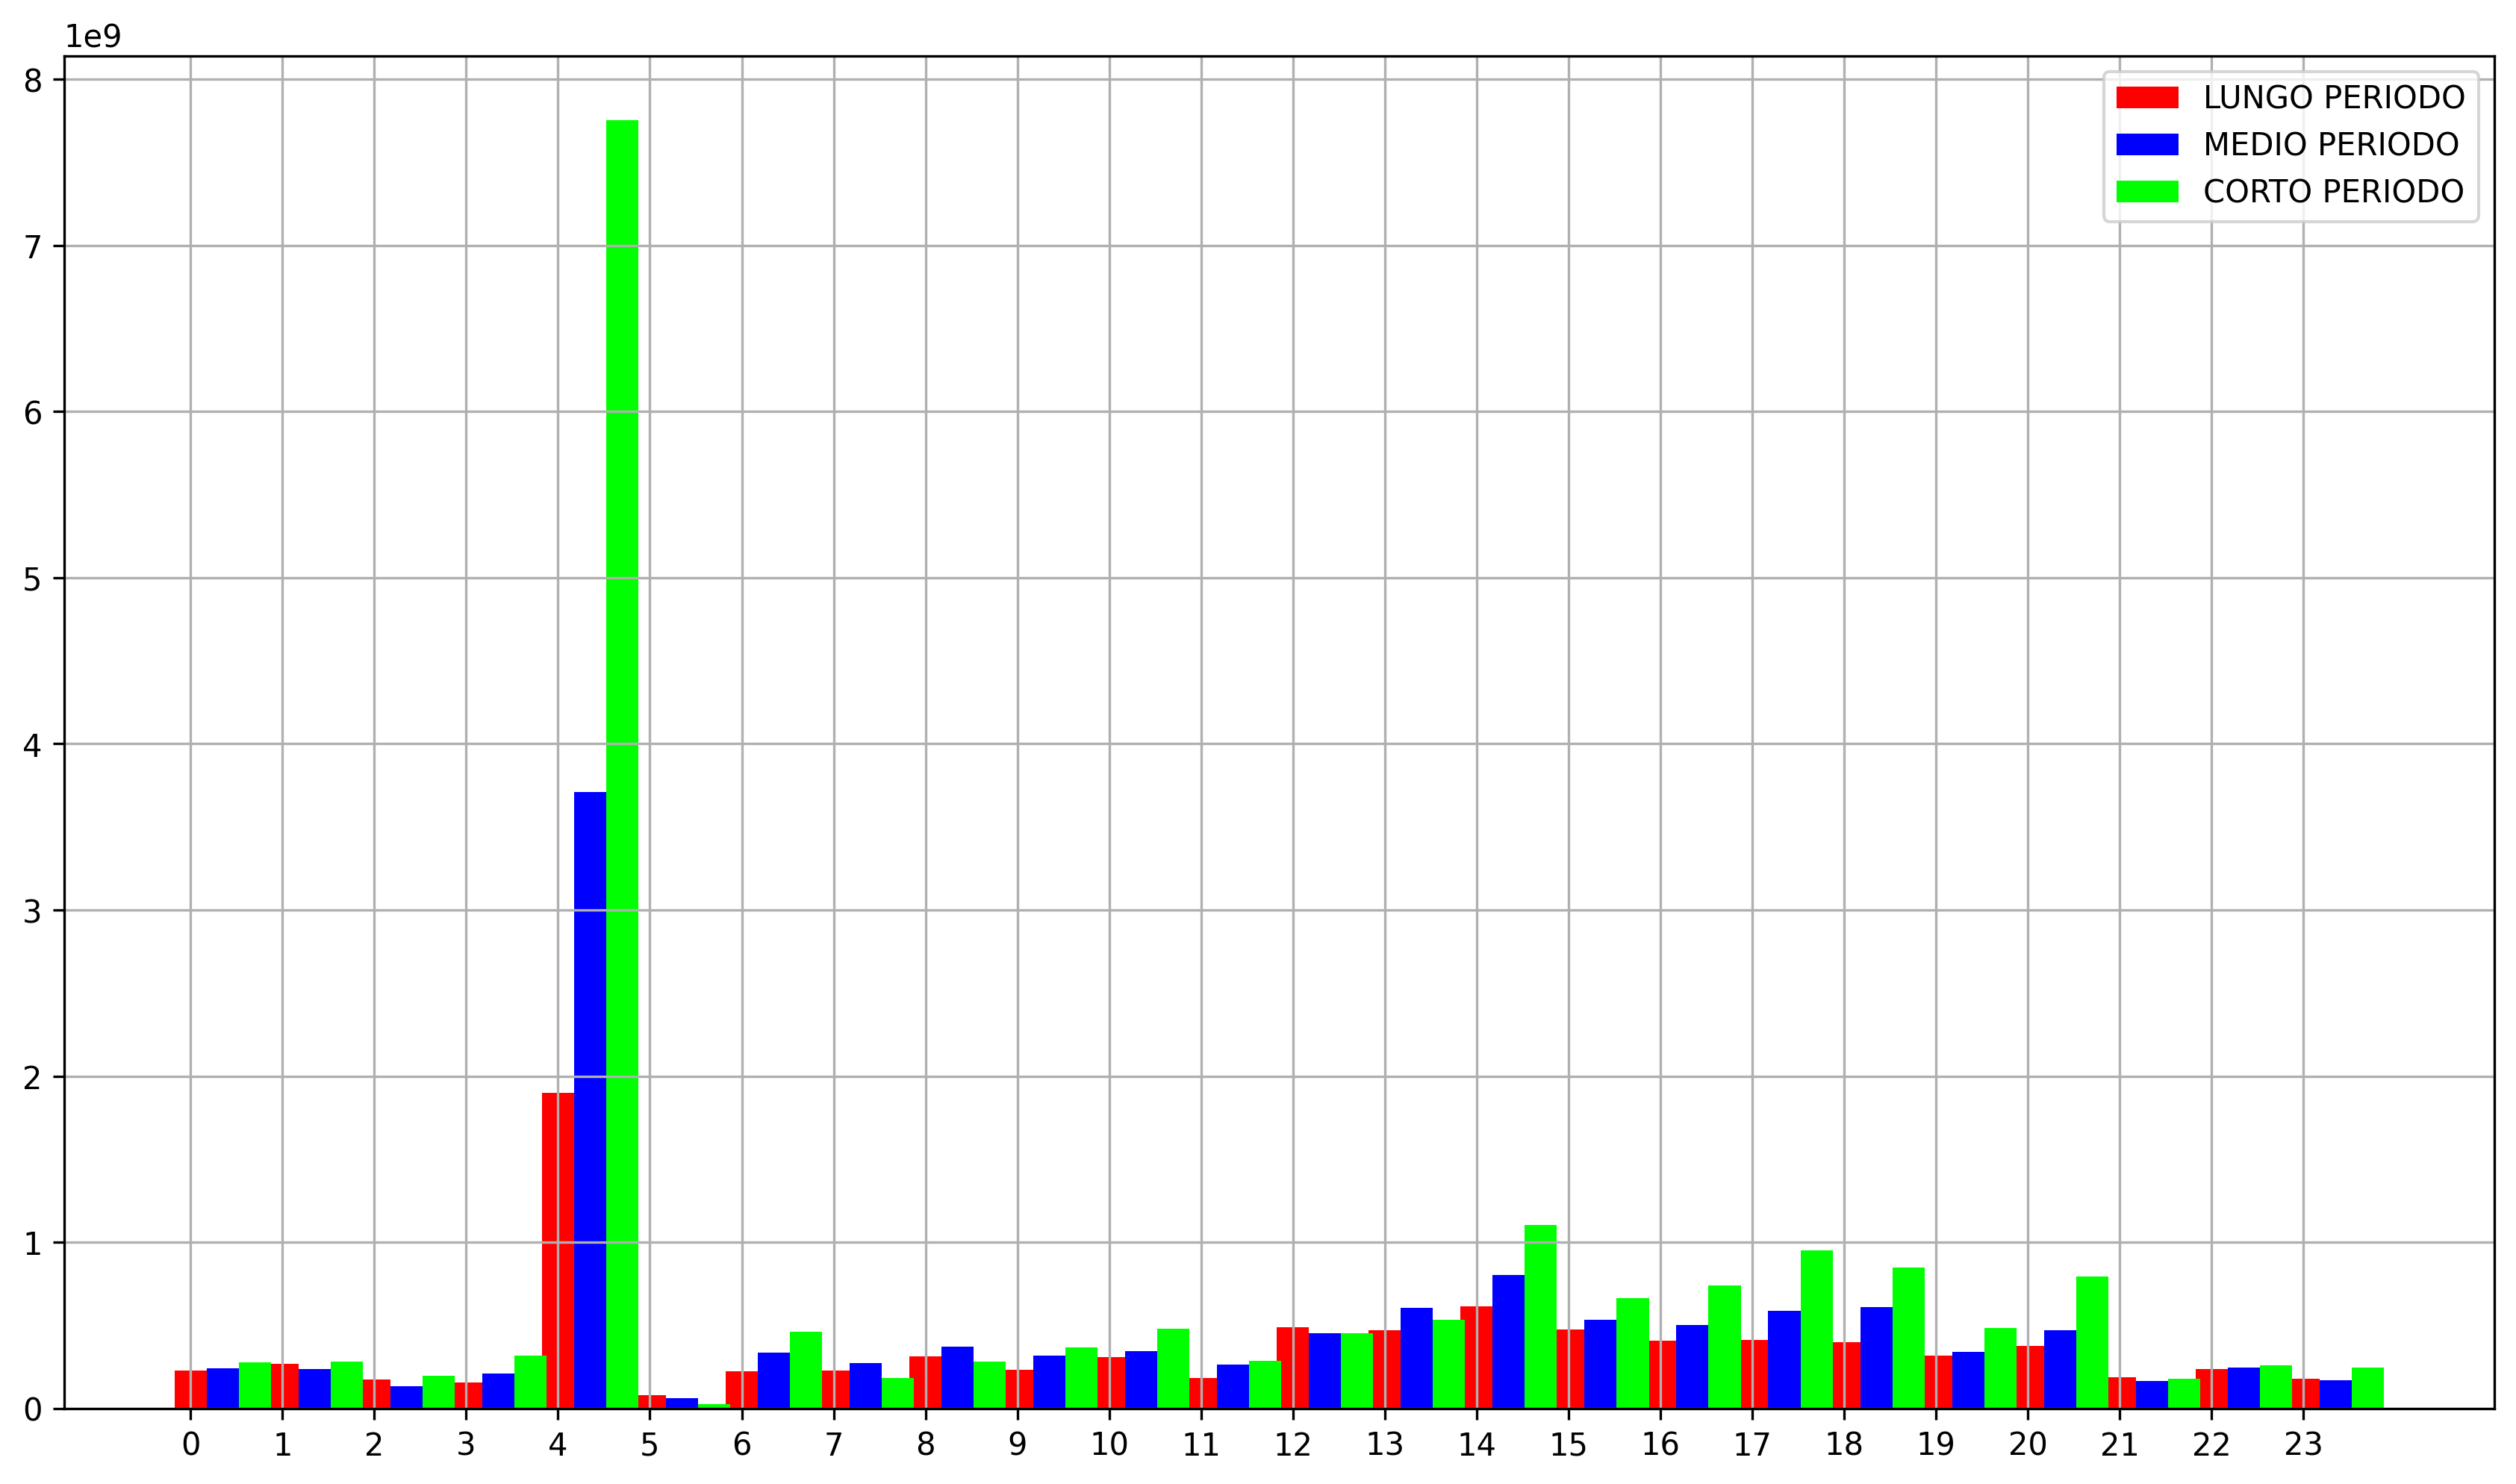

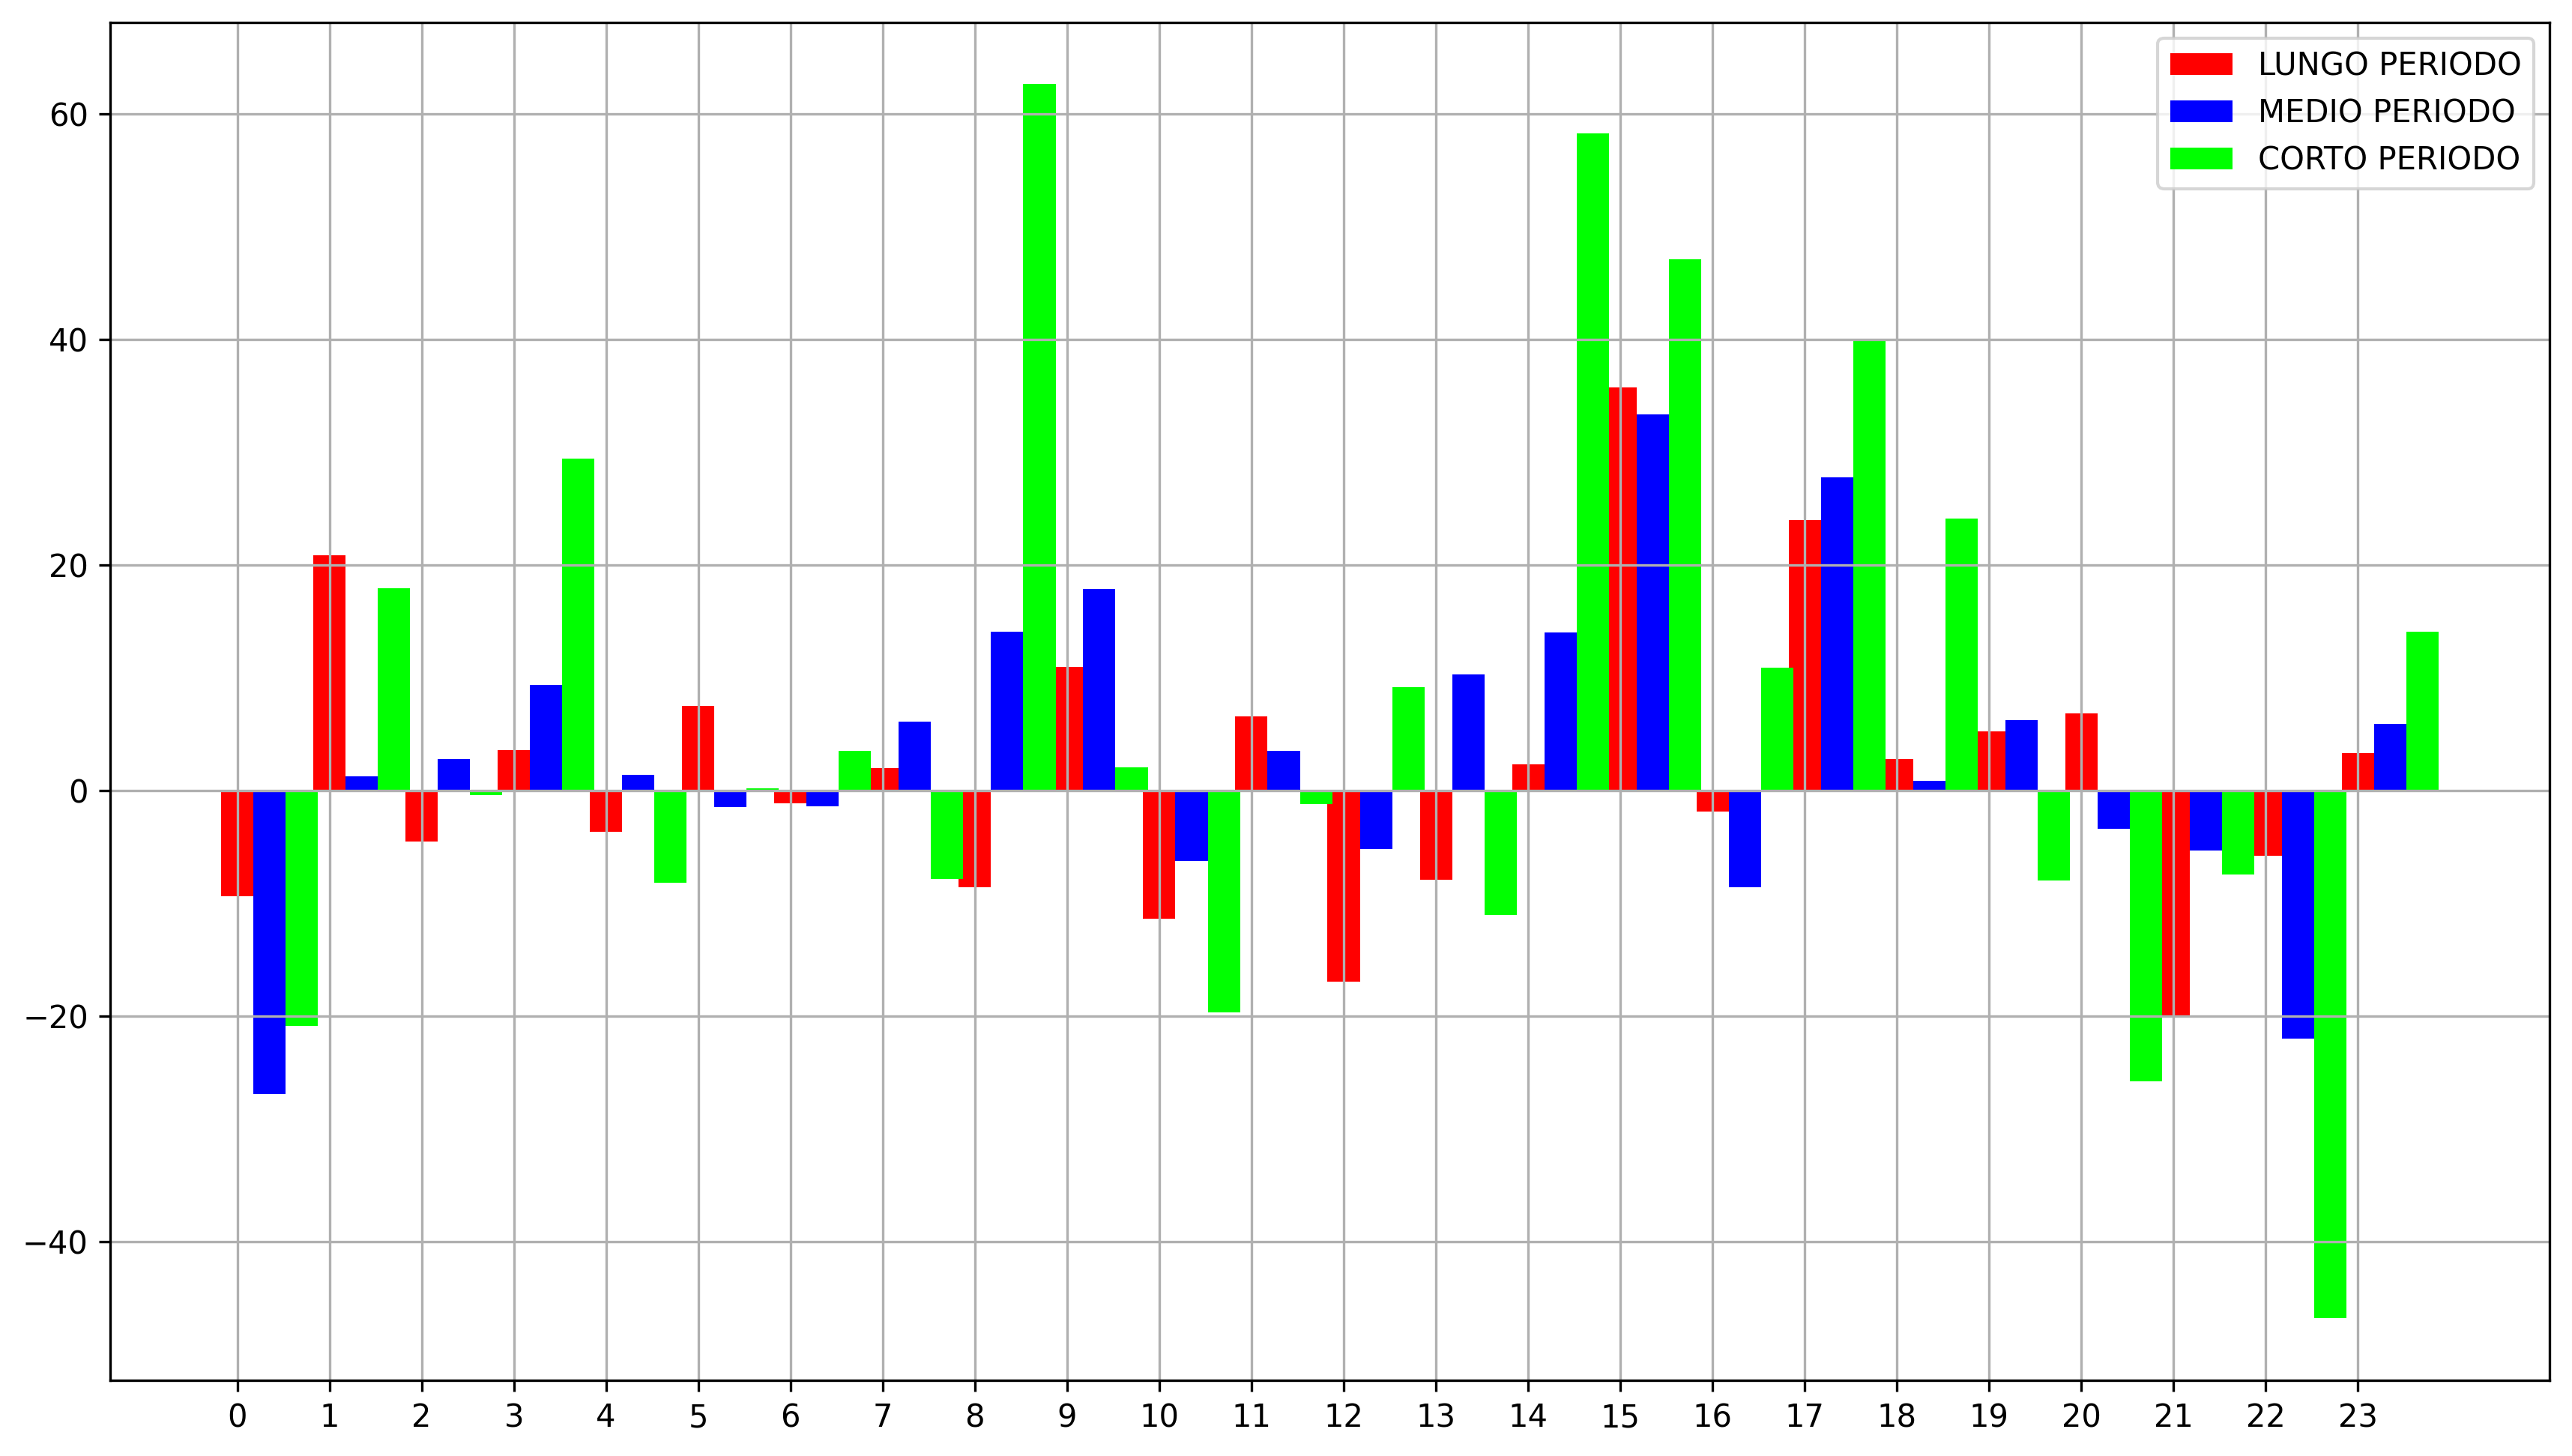

[1, 3, 9, 14, 15, 17, 18, 23]
[20.8454427, 3.5836589, 10.9332682, 2.3235026, 35.711263, 23.9479167, 2.7609375, 3.3208984] [1.2365885, 9.3830729, 17.8544271, 13.9908854, 33.3385417, 27.7898438, 0.8240885, 5.9247396] [17.9012277, 29.4020647, 2.0664062, 58.2887835, 47.1199777, 40.03125, 24.1146763, 14.0736607]
[0, 10, 21, 22]
[-9.3819934, -11.3401693, -20.0723958, -5.8035156] [-26.8885498, -6.2441406, -5.3580729, -21.9914062] [-20.8625488, -19.6439732, -7.4302455, -46.8158482]
dim 8 4
[0, 0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0]
orari Long [1, 1] [16, 19]
peso vettori Long [26.7088542, 0, 0, 0, 0, 0, 0, 0] [28.6139323, 0, 0, 0, 0, 0, 0, 0] [64.1459263, 0, 0, 0, 0, 0, 0, 0]
peso totale Long [119.46871279999999, 0, 0, 0, 0, 0, 0, 0]
orari Short [21] [23]
peso vettori Short [0, 0, -25.8759114, 0] [0, 0, -27.3494791, 0] [0, 0, -54.246093699999996, 0]
peso totale Short [0, 0, -107.47148419999999, 0]


In [ ]:
dati_eth['open']=dati_eth['Open']
dati_eth['high']=dati_eth['High']
dati_eth['low']=dati_eth['Low']
dati_eth['close']=dati_eth['Close']
dati_eth['volume']=dati_eth['Volume']
columns=["open", "high", "low", "close", "volume"]
dati_eth=dati_eth[columns]
dati_eth["avg"]=dati_eth.mean(axis=1)#open+close+low+high/4
dati_eth['hour']=dati_eth.index.hour
dati_eth["med"]=dati_eth.open+(dati_eth.high-dati_eth.low)/2 #centro geometrico dell'escursione
dati_eth["medbody"]=dati_eth.open+abs(dati_eth.open-dati_eth.close)/2#centro geometrico escursione candela
dati_eth["body"]=dati_eth.close-dati_eth.open #estensione della candela e colore 
dati_eth["range"]=dati_eth.high-dati_eth.low
dati_eth["avg"]=round(dati_eth.mean(axis=1),7)#open+close+low+high/4
dati_eth["range"]=round(dati_eth.high-dati_eth.low,7)
dati_eth["CO"]=round(dati_eth.close-dati_eth.open,7)
dati_eth["OL"]=round(dati_eth.open-dati_eth.low,7)
dati_eth["HO"]=round(dati_eth.high-dati_eth.open,7)
dati_eth["CL"]=round(dati_eth.close-dati_eth.low,7)
dati_eth["HC"]=round(dati_eth.high-dati_eth.close,7)
dati_eth["Closeperc"]=round(dati_eth.body/dati_eth.range*100,7)
dati_eth["Color"]=list(map(lambda x:"black" if x<= 0 else "white",dati_eth.CO))
#dati_eth=dati_eth.apply(lambda x: round(x,2))#prendo solo 2 cifre dopo la virgola
dati_eth["CO"]=round(dati_eth.close-dati_eth.open,7)
dati_eth["OL"]=round(dati_eth.open-dati_eth.low,7)
dati_eth["HO"]=round(dati_eth.high-dati_eth.open,7)
dati_eth["CL"]=round(dati_eth.close-dati_eth.low,7)
dati_eth["HC"]=round(dati_eth.high-dati_eth.close,7)
dati_eth["Closeperc"]=round(dati_eth.body/dati_eth.range*100,7)
dati_eth["Color"]=list(map(lambda x:"black" if x<= 0 else "white",dati_eth.CO))
stop_loss_eth_long=dati_eth[dati_eth["CO"]>0]["OL"].describe([.95])
stop_loss_eth_short=-dati_eth[dati_eth["CO"]>0]["OL"].describe([.95])
today=date.today()
DeltaLong= timedelta(days=30)
DeltaMid= timedelta(days=15)
DeltaShort= timedelta(days=7)

endDateLongParsed= today
endDateMidParsed= today
endDateShortParsed= today

startDateLongParsed= (endDateLongParsed-DeltaLong)
startDateMidParsed= (endDateMidParsed-DeltaMid)
startDateShortParsed= (endDateShortParsed-DeltaShort)
print(startDateLongParsed,startDateMidParsed,startDateShortParsed )

normalize=False

instruments_Long=dati_eth.loc[(startDateLongParsed):(endDateLongParsed)]
instruments_Mid=dati_eth.loc[startDateMidParsed:endDateMidParsed]
instruments_Short=dati_eth.loc[startDateShortParsed:endDateShortParsed]

activity_long=[]
activity_mid=[]
activity_short=[]
hours=[]
for hour in range (0,24):
    hours.append(hour)
for hour in hours:
    activity_long.append(round(instruments_Long[(instruments_Long.hour==hour)].volume.mean(),7))
    activity_mid.append(round(instruments_Mid[(instruments_Mid.hour==hour)].volume.mean(),7))
    activity_short.append(round(instruments_Short[(instruments_Short.hour==hour)].volume.mean(),7))
activity_long=np.where(np.isnan(activity_long), 0, activity_long)
activity_mid=np.where(np.isnan(activity_mid), 0, activity_mid)
activity_short=np.where(np.isnan(activity_short), 0, activity_short)
if normalize==True:
    activity_long=normalizeMax(activity_long)
    activity_mid=normalizeMax(activity_mid)
    activity_short=normalizeMax(activity_short)

n_groups=24
fig,ax=plt.subplots(figsize=(14,8),dpi=300)
index=np.arange(n_groups)
bar_width=0.35
opacity=1
rectls1=ax.bar(index,activity_long,bar_width,alpha=opacity,color='red',label='LUNGO PERIODO')
rectls2=ax.bar(index+bar_width,activity_mid,bar_width,alpha=opacity,color='blue',label='MEDIO PERIODO')
rectls3=ax.bar(index+2*bar_width,activity_short,bar_width,alpha=opacity,color='lime',label='CORTO PERIODO')

ax.set_xlabel=('trading hours')
if normalize==True:
    ax.set_ylabel('normalized volumes')
ax.set_ylabel=('volumes')
ax.set_xticks(index)
ax.set_xticklabels((['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']))
ax.legend()
ax.grid(True)
plt.show()
hour_bias=[]
for hour in hours:
    hour_bias.append(round(dati_eth[(dati_eth.hour==hour)].body.mean(),7))
hour_bias=np.where(np.isnan(hour_bias), 0, hour_bias)        
def normalizeMaxMin(array):
    normalized_array=[]
    for elements in array:
        if elements>0:
            normalized_array.append(elements/max(array))
        else:
            normalized_array.append(-elements/(min(array)))#[array!=0]
    return normalized_array
normalize=False
if normalize==True:
    minute_bias=normalizeMaxMin(hour_bias)
hour_bias
#se il body è >0 allora la tendenza media sarà di salita in quell'orario

instruments_Long=dati_eth.loc[(startDateLongParsed):(endDateLongParsed)]
instruments_Mid=dati_eth.loc[(startDateMidParsed):(endDateMidParsed)]
instruments_Short=dati_eth.loc[(startDateShortParsed):(endDateShortParsed)]


hour_bias_long=[]
hour_bias_mid=[]
hour_bias_short=[]
for hour in hours:
    hour_bias_long.append(round(instruments_Long[(instruments_Long.hour==hour)].body.mean(),7))
    hour_bias_mid.append(round(instruments_Mid[(instruments_Mid.hour==hour)].body.mean(),7))
    hour_bias_short.append(round(instruments_Short[(instruments_Short.hour==hour)].body.mean(),7))
    

if normalize==True:
    hour_bias_long=normalizeMaxMin(hour_bias_long)
    hour_bias_mid=normalizeMaxMin(hour_bias_mid)
    hour_bias_short=normalizeMaxMin(hour_bias_short)
    
    

n_groups=24
fig,ax=plt.subplots(figsize=(14,8),dpi=300)
index=np.arange(n_groups)
bar_width=0.35
opacity=1
rectls1=ax.bar(index,hour_bias_long,bar_width,alpha=opacity,color='red',label='LUNGO PERIODO')
rectls2=ax.bar(index+bar_width,hour_bias_mid,bar_width,alpha=opacity,color='blue',label='MEDIO PERIODO')
rectls3=ax.bar(index+2*bar_width,hour_bias_short,bar_width,alpha=opacity,color='lime',label='CORTO PERIODO')

ax.set_xlabel=('trading hours')
if normalize==True:
    ax.set_ylabel('normalized corpo medio')
ax.set_ylabel=('corpo medio')
ax.set_xticks(index)
ax.set_xticklabels=[]
temp=[]
for i in range (0,24):
    temp.append(i)
    ax.set_xticklabels.append(0)

for i in range (0,24):
    ax.set_xticklabels[i]=str(temp[i])
ax.legend()
ax.grid(True)
plt.show()






#DA QUI AUTOMATIZZATO
#range orari positivi e negativi
Positive_Long=[]
Positive_Mid=[]
Positive_Short=[]
Negative_Long=[]
Negative_Mid=[]
Negative_Short=[]

Positive_time=[]
Negative_time=[]
for i in range (0,24):
    if (((hour_bias_long[i])>0) & ((hour_bias_mid[i])>0) & ((hour_bias_short[i])>0)):
        Positive_Long.append(hour_bias_long[i])
        Positive_Mid.append(hour_bias_mid[i])
        Positive_Short.append(hour_bias_short[i])
        Positive_time.append(i)
                     
    if (((hour_bias_long[i])<0) & ((hour_bias_mid[i])<0) & ((hour_bias_short[i])<0)):
        Negative_Long.append(hour_bias_long[i])
        Negative_Mid.append(hour_bias_mid[i])
        Negative_Short.append(hour_bias_short[i])
        Negative_time.append(i)
        
print(Positive_time)        
print(Positive_Long,Positive_Mid, Positive_Short)     
print(Negative_time)        
print(Negative_Long,Negative_Mid, Negative_Short) 


Positive_Dim= len(Positive_time)
Negative_Dim= len(Negative_time)

print("dim",Positive_Dim, Negative_Dim)


Peso_Positive_Long=[]
Peso_Positive_Mid=[]
Peso_Positive_Short=[]

Peso_Negative_Long=[]
Peso_Negative_Mid=[]
Peso_Negative_Short=[]
for i in range (0,(Positive_Dim)):
    Peso_Positive_Long.append(0)
    Peso_Positive_Mid.append(0)
    Peso_Positive_Short.append(0)

for i in range (0,(Negative_Dim)):
    Peso_Negative_Long.append(0)
    Peso_Negative_Mid.append(0)
    Peso_Negative_Short.append(0)
    
print(Peso_Positive_Long,Peso_Negative_Long )

            
x=0
y=0
Long_Start_time=[]
Long_End_time=[]

for i in range (0,(Positive_Dim)):
    if (i<(Positive_Dim-1)) :
        if (((Positive_time[i+1])-(Positive_time[i]))==1):
            
            Peso_Positive_Long[x]= Positive_Long[i+1]+Positive_Long[i]
            Peso_Positive_Mid[x]= Positive_Mid[i+1]+Positive_Mid[i]
            Peso_Positive_Short[x]= Positive_Short[i+1]+ Positive_Short[i]
            
            if y==0 :
                Long_Start_time.append(Positive_time[x])
                Long_End_time.append(Positive_time[i+1]+1)
                y=1
        else:
            x=i+1
            y=0

            
    x=0
y=0
Short_Start_time=[]
Short_End_time=[]

for i in range (0,(Negative_Dim)):
    if (i<(Negative_Dim-1)) :
        
        if (((Negative_time[i+1])-(Negative_time[i]))==1):
            
            Peso_Negative_Long[x]= Negative_Long[i+1]+ Negative_Long[i]
            Peso_Negative_Mid[x]= Negative_Mid[i+1]+Negative_Mid[i]
            Peso_Negative_Short[x]= Negative_Short[i+1]+ Negative_Short[i]
            
            if y==0 :
                Short_Start_time.append(Negative_time[x])
                Short_End_time.append(Negative_time[i+1]+1)
                y=1
        else:
            x=i+1
            y=0

Peso_Totale_Short=[]
Peso_Totale_Long=[]

for i in range (0,len(Peso_Negative_Long)):
    Peso_Totale_Short.append(Peso_Negative_Long[i]+Peso_Negative_Mid[i]+Peso_Negative_Short[i])  
for i in range (0,len(Peso_Positive_Long)):
    Peso_Totale_Long.append(Peso_Positive_Long[i]+Peso_Positive_Mid[i]+Peso_Positive_Short[i])  

print('orari Long', Long_Start_time, Long_End_time)
print('peso vettori Long', Peso_Positive_Long, Peso_Positive_Mid, Peso_Positive_Short )
print('peso totale Long',Peso_Totale_Long)


print('orari Short', Short_Start_time, Short_End_time)
print('peso vettori Short', Peso_Negative_Long, Peso_Negative_Mid, Peso_Negative_Short )
print('peso totale Short',Peso_Totale_Short)



    

Positive_Long_Max= max(Positive_Long)
Positive_Mid_Max= max(Positive_Mid)
Positive_Short_Max= max(Positive_Short)
Positive_time_index= Positive_Long.index(Positive_Long_Max)
Positive_time_Max= Positive_time[Positive_time_index]

Negative_Long_Min= min(Negative_Long)
Negative_Mid_Min= min(Negative_Mid)
Negative_Short_Min= min(Negative_Short)
Negative_time_index= Negative_Long.index(Negative_Long_Min)
Negative_time_Min=Negative_time[Negative_time_index]
Peso_Long=[]
for i in range (0,len(Peso_Totale_Long)):
  if Peso_Totale_Long[i]!=0:
    Peso_Long.append(Peso_Totale_Long[i])

Peso_Short=[]
for i in range (0,len(Peso_Totale_Short)):
  if Peso_Totale_Short[i]!=0:
    Peso_Short.append(Peso_Totale_Short[i])

best_long=max(Peso_Long,default=0)
if best_long!=0:
  indice_long=Peso_Long.index(best_long)
  ingresso_long=Long_Start_time[indice_long]
  uscita_long=Long_End_time[indice_long]

best_short=min(Peso_Short,default=0)
if best_short!=0:
  indice_short=Peso_Short.index(best_short)
  ingresso_short=Short_Start_time[indice_short]
  uscita_short=Short_End_time[indice_short]

if abs(best_long)>=abs(best_short):
  direction_eth_volume='long'
  enter_rules_eth_volume=ingresso_long
  exit_rules_eth_volume=uscita_long
else:
  direction_eth_volume='short'
  enter_rules_eth_volume=ingresso_short
  exit_rules_eth_volume=uscita_short



In [ ]:
!pip3 install alpaca-trade-api
!pip install nest_asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 6.5 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 299 kB 44.4 MB/s 
     |████████████████████████████████| 1.1 MB 36.9 MB/s 
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.4
    Uninstalling msgpack-1.0.4:
      Successfully uninstalled msgpack-1.0.4
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.8.3
    Uninstalling aiohttp-3.8.3:
      Successfully uninstalled aiohttp-3.8.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from alpaca_trade_api.stream import Stream
from alpaca_trade_api.rest import URL
import alpaca_trade_api as tradeapi
import nest_asyncio
import numpy as np
import pandas as pd
import time
import datetime
import math
import time
import datetime
import yfinance as yf

def marketposition_generator(enter_rules,exit_rules):
    service_df=pd.DataFrame(index=enter_rules.index)
    service_df['enter_rules']=enter_rules
    service_df['exit_rules']=exit_rules
    status=0
    mp=[]
    for (i,j) in zip(enter_rules,exit_rules):#lega enter e exit con il loro valore temporale
        if status==0:
            if i ==1 and j!=-1:
                status=1
        else:
            if j==-1:
                status=0
        mp.append(status)
    service_df['mp_new']=mp
    service_df.mp_new=service_df.mp_new.shift(1)#ritardo mp
    service_df.iloc[0,2]=0
    #service_df.to_csv("marketposition_generator.csv")
    return service_df.mp_new


def tick_correction_up(level,tick):
    if level != level:
        level=0
    multiplier=math.ceil(level/tick)
    return multiplier*tick

def tick_correction_down(level,tick):
    if level != level:
        level=0
    multiplier=math.floor(level/tick)
    return multiplier*tick

def stop_check(dataframe,rules,level,direction):
    service_dataframe=pd.DataFrame(index=dataframe.index)
    service_dataframe['rules']=rules
    service_dataframe['level']=level #livelli di ingresso boolenani
    service_dataframe['low']=dataframe.low
    service_dataframe['high']=dataframe.high
    if direction=='long':
        service_dataframe['new_rules']=np.where((service_dataframe.rules==True)&(service_dataframe.high.shift(-1)>= service_dataframe.level.shift(-1)),True,False)
    if direction=='short':
        service_dataframe['new_rules']=np.where((service_dataframe.rules==True)&(service_dataframe.low.shift(-1)<= service_dataframe.level.shift(-1)),True,False)
    return service_dataframe.new_rules

def limit_check(dataframe,rules,level,direction):
    service_dataframe=pd.DataFrame()
    service_dataframe['rules']=rules
    service_dataframe['level']=level
    service_dataframe['low']=dataframe.low
    service_dataframe['high']=dataframe.high
    if direction=='long':
        service_dataframe['new_rules']=np.where((service_dataframe.rules==True)&(service_dataframe.low.shift(-1)<=  service_dataframe.level.shift(-1)),True,False)
    if direction=='short':
        service_dataframe['new_rules']=np.where((service_dataframe.rules==True)&(service_dataframe.high.shift(-1)>=  service_dataframe.level.shift(-1)),True,False)
    return service_dataframe.new_rules


def apply_trading_system_BTC_volume(imported_dataframe,bigpoint_value,tick,direction,order_type,enter_level, enter_rules,exit_rules):
    instruments=2
    costs=0
    real_entry=1
    global tmp_BTC
    dataframe=imported_dataframe.copy()
    if order_type=="stop":
        enter_rules=stop_check(dataframe,enter_rules,enter_level,direction)
    if order_type=="limit":
        enter_rules=limit_check(dataframe,enter_rules,enter_level,direction)
    dataframe['enter_level']=enter_level
    dataframe['enter_rules']=enter_rules.apply(lambda x: 1 if x==True else 0)
    dataframe['exit_rules']=exit_rules.apply(lambda x: -1 if x==True else 0)
    dataframe['mp']=marketposition_generator(dataframe.enter_rules,dataframe.exit_rules)
    if order_type=="market":
        dataframe['entry_price']=np.where((dataframe.mp.shift(1)==0)&(dataframe.mp==1),dataframe.open, np.nan)
        if instruments==1:
            dataframe['number_of_stocks']=np.where((dataframe.mp.shift(1)==0)&(dataframe.mp==1),operation_money/dataframe.Open,np.nan)
    if order_type=="stop":
        if direction=="long":
            dataframe.enter_level=dataframe.enter_level.apply(lambda x: tick_correction_up(x,tick))
            real_entry=np.where(dataframe.open>dataframe.enter_level,dataframe.open,dataframe.enter_level)
            dataframe['entry_price']=np.where((dataframe.mp.shift(1)==0)&(dataframe.mp==1),real_entry,np.nan)
        if direction=="short":
            dataframe.enter_level=dataframe.enter_level.apply(lambda x: tick_correction_down(x,tick))
            real_entry=np.where(dataframe.open<dataframe.enter_level,dataframe.open,dataframe.enter_level)
            dataframe['entry_price']=np.where((dataframe.mp.shift(1)==0)&(dataframe.mp==1),real_entry,np.nan)
        if instruments==1:
            dataframe['number_of_stocks']=np.where((dataframe.mp.shift(1)==0)&(dataframe.mp==1),operation_money/real_entry,np.nan)

    if order_type=="limit":
        if direction=="long":
            dataframe.enter_level=dataframe.enter_level.apply(lambda x: tick_correction_down(x,tick))
            real_entry=np.where(dataframe.open<dataframe.enter_level,dataframe.open,dataframe.enter_level)
            dataframe['entry_price']=np.where((dataframe.mp.shift(1)==0)&(dataframe.mp==1),real_entry,np.nan)
        if direction=="short":
            dataframe.enter_level=dataframe.enter_level.apply(lambda x: tick_correction_up(x,tick))
            real_entry=np.where(dataframe.open>dataframe.enter_level,dataframe.open,dataframe.enter_level)
            dataframe['entry_price']=np.where((dataframe.mp.shift(1)==0)&(dataframe.mp==1),real_entry,np.nan)
        if instruments==1:
            dataframe['number_of_stocks']=np.where((dataframe.mp.shift(1)==0)&(dataframe.mp==1),operation_money/real_entry,np.nan)
    dataframe['entry_price']=dataframe['entry_price'].fillna(method='ffill')
    dataframe['events_in']=np.where((dataframe.mp==1)&(dataframe.mp.shift(1)==0),'entry','')
    if instruments==1:
        dataframe['number_of_stocks']=dataframe['number_of_stocks'].apply(lambda x: round(x,0)).fillna(method='ffill')

    if direction=="long":
        if (dataframe.mp[-1]==1)&(dataframe.mp[-2]==0)&(tmp_BTC==0):
            alpaca_client.submit_order(
                    symbol="BTC/USD",
                    qty=4,
                    side="buy",
                    time_in_force="gtc"
                    )
            tmp_BTC=1
        if (dataframe.mp[-1]==1)&(dataframe.exit_rules[-1]==-1)&(tmp_BTC==1):
            portfolio = alpaca_client.list_positions()
            alpaca_client.submit_order(
                    symbol="BTC/USD",
                    qty=int(str(portfolio[0].qty)),
                    side="sell",
                    time_in_force="gtc"
                    )
            tmp_BTC=0
        if instruments==1:
            dataframe['open_operations']=(dataframe.close-dataframe.entry_price)*dataframe.number_of_stocks
            dataframe['open_operations'] = np.where(
                    (dataframe.mp==1)&(dataframe.mp.shift(-1)==0),
                    (dataframe.open.shift(-1)-dataframe.entry_price)*dataframe.number_of_stocks-2*costs,
                    dataframe.open_operations
                    )
        if instruments==2:
            dataframe['open_operations']=(-dataframe.entry_price+dataframe.close)*bigpoint_value
            dataframe['open_operations']=np.where(
                    (dataframe.mp==1)&(dataframe.mp.shift(-1)==0),
                    (dataframe.open.shift(-1)-dataframe.entry_price)*bigpoint_value-2*costs,
                    dataframe.open_operations
                    )
    if direction=="short":
        if (dataframe.mp[-1]==1)&(dataframe.mp[-2]==0)&(tmp_BTC==0):
            portfolio = alpaca_client.list_positions()
            alpaca_client.submit_order(
                    symbol="BTC/USD",
                    qty=4,
                    side="sell",
                    time_in_force="gtc"
                    )
            tmp_BTC=1
        if (dataframe.mp[-1]==1)&(dataframe.exit_rules[-1]==-1)&(tmp_BTC==1):
            portfolio = alpaca_client.list_positions()
            alpaca_client.submit_order(
                    symbol="BTC/USD",
                    qty=int(str(portfolio[0].qty)),
                    side="buy",
                    time_in_force="gtc"
                    )
            tmp_BTC=0
        if instruments==1:
            dataframe['open_operations']=(dataframe.entry_price-dataframe.close)*dataframe.number_of_stocks
            dataframe['open_operations']=np.where(
                    (dataframe.mp==1)&(dataframe.mp.shift(-1)==0),
                    (-dataframe.open.shift(-1)+dataframe.entry_price)*dataframe.number_of_stocks-2*costs,
                    dataframe.open_operations
                    )
        if instruments==2:
            dataframe['open_operations']=(dataframe.entry_price-dataframe.close)*bigpoint_value
            dataframe['open_operations']=np.where(
                    (dataframe.mp==1)&(dataframe.mp.shift(-1)==0),
                    (-dataframe.open.shift(-1)+dataframe.entry_price)*bigpoint_value-2*costs,
                    dataframe.open_operations
                    )
    dataframe['open_operations']=np.where(dataframe.mp==1,dataframe.open_operations,0)
    dataframe['events_out']=np.where((dataframe.mp==1)&(dataframe.exit_rules==-1),'exit','')
    dataframe['operations']=np.where((dataframe.exit_rules==-1)&(dataframe.mp==1),dataframe.open_operations,np.nan)
    dataframe['closed_equity']=dataframe.operations.fillna(0).cumsum()
    dataframe['open_equity']=dataframe.closed_equity+dataframe.open_operations-dataframe.operations.fillna(0)
    return dataframe

def apply_trading_system_ETH_volume(imported_dataframe,bigpoint_value,tick,direction,order_type,enter_level, enter_rules,exit_rules):
    instruments=2
    costs=0
    real_entry=1
    global tmp_ETH
    dataframe=imported_dataframe.copy()
    if order_type=="stop":
        enter_rules=stop_check(dataframe,enter_rules,enter_level,direction)
    if order_type=="limit":
        enter_rules=limit_check(dataframe,enter_rules,enter_level,direction)
    dataframe['enter_level']=enter_level
    dataframe['enter_rules']=enter_rules.apply(lambda x: 1 if x==True else 0)
    dataframe['exit_rules']=exit_rules.apply(lambda x: -1 if x==True else 0)
    dataframe['mp']=marketposition_generator(dataframe.enter_rules,dataframe.exit_rules)
    if order_type=="market":
        dataframe['entry_price']=np.where((dataframe.mp.shift(1)==0)&(dataframe.mp==1),dataframe.open, np.nan)
        if instruments==1:
            dataframe['number_of_stocks']=np.where((dataframe.mp.shift(1)==0)&(dataframe.mp==1),operation_money/dataframe.Open,np.nan)
    if order_type=="stop":
        if direction=="long":
            dataframe.enter_level=dataframe.enter_level.apply(lambda x: tick_correction_up(x,tick))
            real_entry=np.where(dataframe.open>dataframe.enter_level,dataframe.open,dataframe.enter_level)
            dataframe['entry_price']=np.where((dataframe.mp.shift(1)==0)&(dataframe.mp==1),real_entry,np.nan)
        if direction=="short":
            dataframe.enter_level=dataframe.enter_level.apply(lambda x: tick_correction_down(x,tick))
            real_entry=np.where(dataframe.open<dataframe.enter_level,dataframe.open,dataframe.enter_level)
            dataframe['entry_price']=np.where((dataframe.mp.shift(1)==0)&(dataframe.mp==1),real_entry,np.nan)
        if instruments==1:
            dataframe['number_of_stocks']=np.where((dataframe.mp.shift(1)==0)&(dataframe.mp==1),operation_money/real_entry,np.nan)

    if order_type=="limit":
        if direction=="long":
            dataframe.enter_level=dataframe.enter_level.apply(lambda x: tick_correction_down(x,tick))
            real_entry=np.where(dataframe.open<dataframe.enter_level,dataframe.open,dataframe.enter_level)
            dataframe['entry_price']=np.where((dataframe.mp.shift(1)==0)&(dataframe.mp==1),real_entry,np.nan)
        if direction=="short":
            dataframe.enter_level=dataframe.enter_level.apply(lambda x: tick_correction_up(x,tick))
            real_entry=np.where(dataframe.open>dataframe.enter_level,dataframe.open,dataframe.enter_level)
            dataframe['entry_price']=np.where((dataframe.mp.shift(1)==0)&(dataframe.mp==1),real_entry,np.nan)
        if instruments==1:
            dataframe['number_of_stocks']=np.where((dataframe.mp.shift(1)==0)&(dataframe.mp==1),operation_money/real_entry,np.nan)
    dataframe['entry_price']=dataframe['entry_price'].fillna(method='ffill')
    dataframe['events_in']=np.where((dataframe.mp==1)&(dataframe.mp.shift(1)==0),'entry','')
    if instruments==1:
        dataframe['number_of_stocks']=dataframe['number_of_stocks'].apply(lambda x: round(x,0)).fillna(method='ffill')

    if direction=="long":
        if (dataframe.mp[-1]==1)&(dataframe.mp[-2]==0)&(tmp_ETH==0):
            alpaca_client.submit_order(
                    symbol="ETH/USD",
                    qty=4,
                    side="buy",
                    time_in_force="gtc"
                    )
            tmp_ETH=1
        if (dataframe.mp[-1]==1)&(dataframe.exit_rules[-1]==-1)&(tmp_ETH==1):
            portfolio = alpaca_client.list_positions()
            alpaca_client.submit_order(
                    symbol="ETH/USD",
                    qty=int(str(portfolio[0].qty)),
                    side="sell",
                    time_in_force="gtc"
                    )
            tmp_ETH=0
        if instruments==1:
            dataframe['open_operations']=(dataframe.close-dataframe.entry_price)*dataframe.number_of_stocks
            dataframe['open_operations']=np.where((dataframe.mp==1)&(dataframe.mp.shift(-1)==0),(dataframe.open.shift(-1)-dataframe.entry_price)*dataframe.number_of_stocks-2*costs,dataframe.open_operations)
        if instruments==2:
            dataframe['open_operations']=(-dataframe.entry_price+dataframe.close)*bigpoint_value
            dataframe['open_operations']=np.where((dataframe.mp==1)&(dataframe.mp.shift(-1)==0),(dataframe.open.shift(-1)-dataframe.entry_price)*bigpoint_value-2*costs,dataframe.open_operations)
    if direction=="short":
        if (dataframe.mp[-1]==1)&(dataframe.mp[-2]==0)&(tmp_ETH==0):
            alpaca_client.submit_order(
                    symbol="ETH/USD",
                    qty=4,
                    side="sell",
                    time_in_force="gtc"
                    )
            tmp_ETH=1
        if (dataframe.mp[-1]==1)&(dataframe.exit_rules[-1]==-1)&(tmp_ETH==1):
            portfolio = alpaca_client.list_positions()
            alpaca_client.submit_order(
                    symbol="ETH/USD",
                    qty=int(str(portfolio[0].qty)),
                    side="buy",
                    time_in_force="gtc"
                    )
            tmp_ETH=0
        if instruments==1:
            dataframe['open_operations']=(dataframe.entry_price-dataframe.close)*dataframe.number_of_stocks
            dataframe['open_operations']=np.where((dataframe.mp==1)&(dataframe.mp.shift(-1)==0),(-dataframe.open.shift(-1)+dataframe.entry_price)*dataframe.number_of_stocks-2*costs,dataframe.open_operations)
        if instruments==2:
            dataframe['open_operations']=(dataframe.entry_price-dataframe.close)*bigpoint_value
            dataframe['open_operations']=np.where((dataframe.mp==1)&(dataframe.mp.shift(-1)==0),(-dataframe.open.shift(-1)+dataframe.entry_price)*bigpoint_value-2*costs,dataframe.open_operations)
    dataframe['open_operations']=np.where(dataframe.mp==1,dataframe.open_operations,0)
    dataframe['events_out']=np.where((dataframe.mp==1)&(dataframe.exit_rules==-1),'exit','')
    dataframe['operations']=np.where((dataframe.exit_rules==-1)&(dataframe.mp==1),dataframe.open_operations,np.nan)
    dataframe['closed_equity']=dataframe.operations.fillna(0).cumsum()
    dataframe['open_equity']=dataframe.closed_equity+dataframe.open_operations-dataframe.operations.fillna(0)
    return dataframe

def run_connection(stream):
    try:
        stream.run()
    except KeyboardInterrupt:
        print("Interrupted execution by the user")
        stream.run_until_complete(stream.stop_ws())
        exit(0)
    except Exception as e:
        print(f'Exception from websocket connection: {e}')
    finally:
        print('Trying to re-establish connection')
        time.sleep(3)
        run_connection(stream)


async def bar_BTC_callback(bars):
    global df_BTC
    global direction_BTC_volume
    global enter_rules_BTC_volume
    global exit_rules_BTC_volume
    df_temp_BTC = pd.DataFrame()  
    present_time = datetime.datetime.fromtimestamp(bars.timestamp/10**9).strftime("%Y-%m-%d %H:%M:%S")
    df_temp_BTC["time"] = [present_time]
    df_temp_BTC["open"] = [bars.open]
    df_temp_BTC["high"] = [bars.high]
    df_temp_BTC["low"] = [bars.low]
    df_temp_BTC["close"] = [bars.close]
    df_temp_BTC["volume"] = [bars.volume]
    df_temp_BTC["hour"]=int(datetime.datetime.fromtimestamp(bars.timestamp/10**9).strftime("%H"))
    df_temp_BTC.set_index(['time'], drop = False, inplace = True)
    columns=["open", "high", "low", "close", "volume","hour"]
    df_temp_BTC=df_temp_BTC[columns]
    df_BTC=df_BTC.append(df_temp_BTC)
    if len(df_BTC)>59:
        df_BTC['llv59']=df_BTC.low.rolling(59).min()
        df_BTC['hhv59']=df_BTC.high.rolling(59).max()
    tmp_element = df_BTC[(df_BTC.hour==22)]
    if tmp_element is not None:
        chiusura_BTC=tmp_element.open
        print(df_BTC, flush=True)
        if len(df_BTC)>59:
            enter_level_BTC_volume=df_BTC.llv59.shift(1)
            apply_trading_system_BTC_volume(df_BTC,bigpoint_value,tick,direction_BTC_volume,order_type,enter_level_BTC_volume,enter_rules_BTC_volume,exit_rules_BTC_volume)

async def bar_ETH_callback(bars):
    global df_ETH
    global direction_ETH_volume
    global enter_rules_ETH_volume
    global exit_rules_ETH_volume
    df_temp_ETH = pd.DataFrame()  
    present_time = datetime.datetime.fromtimestamp(bars.timestamp/10**9).strftime("%Y-%m-%d %H:%M:%S")
    df_temp_ETH["time"] = [present_time]
    df_temp_ETH["open"] = [bars.open]
    df_temp_ETH["high"] = [bars.high]
    df_temp_ETH["low"] = [bars.low]
    df_temp_ETH["close"] = [bars.close]
    df_temp_ETH["volume"] = [bars.volume]
    df_temp_ETH["hour"]=int(datetime.datetime.fromtimestamp(bars.timestamp/10**9).strftime("%H"))
    df_temp_ETH.set_index(['time'], drop = False, inplace = True)
    columns=["open", "high", "low", "close", "volume","hour"]
    df_temp_ETH=df_temp_ETH[columns]
    df_ETH=df_ETH.append(df_temp_ETH)
    if len(df_ETH)>59:
        df_ETH['llv59']=df_ETH.low.rolling(59).min()
        df_ETH['hhv59']=df_ETH.high.rolling(59).max()
    tmp_element=df_ETH[(df_ETH.hour==22)]
    if tmp_element is not None:
        chiusura_ETH=tmp_element.open
        print(df_ETH, flush=True)
        if len(df_ETH)>59:
            enter_level_ETH_volume=df_ETH.hhv59.shift(1)#*60
            apply_trading_system_ETH_volume(df_ETH,bigpoint_value,tick,direction_ETH_volume,order_type,enter_level_ETH_volume,enter_rules_ETH_volume,exit_rules_ETH_volume)

### ENTRY ###

API_SECRET =  "fOqslHTgJLcypUrotZqrzd4TtMXgEJtTneAfh7tC"
API_KEY = "PKBF5097YLEUQTA82TDM"
DATA_FEED = "iex" # Change to "sip" if using paid subscription
BASE_URL = URL("https://paper-api.alpaca.markets")

tmp_BTC=0
tmp_ETH=0

df_BTC = pd.DataFrame()  
df_ETH= pd.DataFrame()  
bigpoint_value=1
instruments=2 #1=azioni/valute, 2=future
operation_money=1000#investimento monetario
tick=0.1
order_type="stop"#oppure limit o stop

# Instantiate Stream class
stream = Stream(API_KEY,
        API_SECRET,
        base_url=BASE_URL,
        data_feed=DATA_FEED,                 
        crypto_exchanges=['CBSE'],                
        )
#alpaca_stream = tradeapi.Stream(ALPACA_API_KEY, ALPACA_SECRET_KEY, raw_data=True, crypto_exchanges=['FTXU'])
alpaca_client = tradeapi.REST(key_id=API_KEY, secret_key=API_SECRET, 
        base_url=BASE_URL, api_version='v2')
# obtain account information
account = alpaca_client.get_account()
portfolio = alpaca_client.list_positions()
nest_asyncio.apply()


SYMBOL_BTC = "BTCUSD"
SYMBOL_ETH = "ETHUSD"
stream.subscribe_crypto_bars(bar_BTC_callback, SYMBOL_BTC)
stream.subscribe_crypto_bars(bar_ETH_callback, SYMBOL_ETH)

run_connection(stream)

